Chapter 15
# 最短路径问题，有向图
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [57]:
# 创建图
G = nx.DiGraph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "H"])

# 有向边
G.add_edge("A", "B", weight=4)
G.add_edge("H", "A", weight=8)
G.add_edge("B", "C", weight=8)
G.add_edge("H", "B", weight=11)
G.add_edge("C", "D", weight=7)
G.add_edge("F", "C", weight=4)
G.add_edge("C", "I", weight=2)
G.add_edge("E", "D", weight=9)
G.add_edge("D", "F", weight=14)
G.add_edge("E", "F", weight=10) # 颠倒顺序
G.add_edge("G", "F", weight=2)
G.add_edge("G", "H", weight=1)
G.add_edge("I", "G", weight=6)
G.add_edge("H", "I", weight=7)

pos = nx.spring_layout(G, seed = 28)
edge_labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}

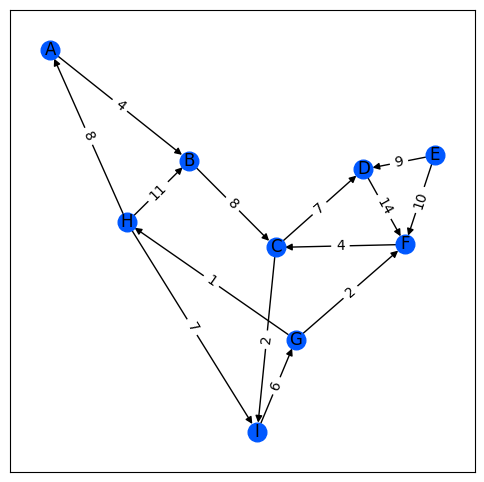

In [58]:
plt.figure(figsize = (6,6))
nx.draw_networkx(G, 
                 pos = pos,
                 node_color = '#0058FF',
                 node_size = 180)
nx.draw_networkx_edge_labels(G, 
                             pos = pos,
                             edge_labels=edge_labels)
plt.savefig('有向图.svg')

## 指定两节点最短距离

In [59]:
# 确定是否存在路径

nx.has_path(G, 
            source = "A", # 始点
            target = "E", # 终点
           )

False

In [61]:
nx.has_path(G, 
            source = "E", # 始点
            target = "A", # 终点
           )

True

In [62]:
# 找到E、A节点之间的最短距离，考虑权重
path_E_2_A = nx.shortest_path(G, 
                              source = "E", # 始点
                              target = "A", # 终点
                              weight="weight")
print(path_E_2_A)

['E', 'F', 'C', 'I', 'G', 'H', 'A']


In [63]:
# 最短距离值
nx.shortest_path_length(G, 
                        source = "E", # 始点
                        target = "A", # 终点
                        weight="weight")

31

In [64]:
# 最短路径的边，列表的每个元素为元组
# 元组有两个元素，代表边的两个节点
path_edges = list(zip(path_E_2_A, path_E_2_A[1:]))

# 最短路径所在边：红色
# 其他边：黑色
edge_colors = ["#FF5800" 
               if edge in path_edges 
                       or tuple(reversed(edge)) in path_edges 
               else "black" for edge in G.edges()]

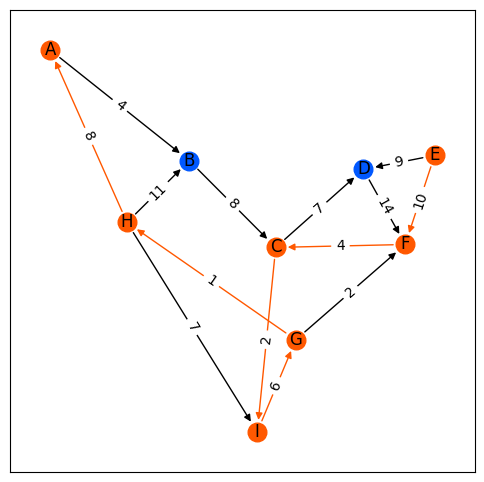

In [65]:
# 可视化图
plt.figure(figsize = (6,6))
# 路径上的节点
nx.draw_networkx_nodes(G, pos, 
                       nodelist = path_E_2_A,
                       node_color = '#FF5800',
                       node_size = 180)

# 路径之外其他节点
not_path_E_2_A = set(G.nodes()) - set(path_E_2_A)
nx.draw_networkx_nodes(G, pos, 
                       nodelist = not_path_E_2_A,
                       node_color = '#0058FF',
                       node_size = 180)

nx.draw_networkx_edges(G, pos, 
                       edge_color=edge_colors)

nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(
    G, pos, edge_labels=edge_labels)

plt.savefig('E、A最短距离，有向图.svg')

## 起点为A的所有最短路径

In [66]:
path_from_A = nx.shortest_path(G, 
                               source = "A", # 起点
                               weight="weight")
print(path_from_A)

{'A': ['A'], 'B': ['A', 'B'], 'C': ['A', 'B', 'C'], 'D': ['A', 'B', 'C', 'D'], 'I': ['A', 'B', 'C', 'I'], 'G': ['A', 'B', 'C', 'I', 'G'], 'F': ['A', 'B', 'C', 'I', 'G', 'F'], 'H': ['A', 'B', 'C', 'I', 'G', 'H']}


In [68]:
# 最短距离值
nx.shortest_path_length(G, 
                        source = "A", # 始点
                        weight="weight")

{'A': 0, 'B': 4, 'C': 12, 'I': 14, 'D': 19, 'G': 20, 'H': 21, 'F': 22}

## 终点为E的所有最短路径

In [46]:
path_2_E = nx.shortest_path(G, 
                            target = "E", # 终点
                            weight="weight")
# nx.single_source_shortest_path()
print(path_2_E)

{'E': ['E'], 'F': ['F', 'E'], 'D': ['D', 'F', 'E'], 'G': ['G', 'F', 'E'], 'I': ['I', 'G', 'F', 'E'], 'C': ['C', 'I', 'G', 'F', 'E'], 'H': ['H', 'I', 'G', 'F', 'E'], 'B': ['B', 'C', 'I', 'G', 'F', 'E'], 'A': ['A', 'B', 'C', 'I', 'G', 'F', 'E']}


In [69]:
# 最短距离值
nx.shortest_path_length(G, 
                        target = "E", # 终点
                        weight="weight")
# nx.single_source_shortest_path_length()

{'E': 0}

## 图中任意两点所有最短路径

In [70]:
path_all = nx.shortest_path(G, 
                            weight="weight")

In [71]:
# path_all
# path_all.keys()

In [73]:
path_all['E']['A']

['E', 'F', 'C', 'I', 'G', 'H', 'A']

In [24]:
# Shortest_path_matrix = np.array([[v[j] for j in list(path_all.keys())] 
#           for k, v in path_all.items()])

C:\Users\james\AppData\Local\Temp\ipykernel_3828\3100065470.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Shortest_path_matrix = np.array([[v[j] for j in list(path_all.keys())]


In [29]:
# Shortest_path_matrix

In [74]:
# 最短距离值
distances_all = dict(nx.shortest_path_length(G, 
                        weight="weight"))

In [17]:
# distances_all

In [81]:
list_nodes = list(G.nodes())
Shortest_D_matrix = np.full((len(G.nodes()), 
                             len(G.nodes())), np.nan)

In [86]:
for i,i_node in enumerate(list_nodes):
    for j,j_node in enumerate(list_nodes):
        try:
            d_ij = distances_all[i_node][j_node]
            Shortest_D_matrix[i][j] = d_ij
        except KeyError:
            print(i_node + ' to ' + j_node + ': no path')
    

A to E: no path
B to E: no path
C to E: no path
D to E: no path
F to E: no path
G to E: no path
H to E: no path
I to E: no path


In [19]:
# distances_all.keys()

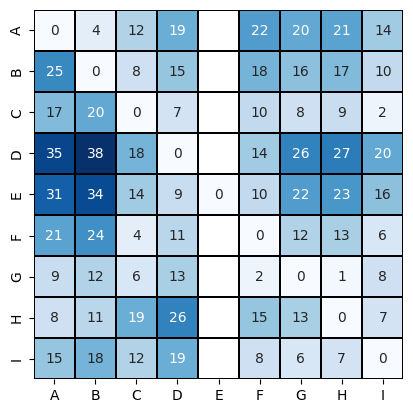

In [87]:
sns.heatmap(Shortest_D_matrix, cmap = 'Blues', 
            annot = True, fmt = '.0f',
            xticklabels = list(G.nodes), 
            yticklabels = list(G.nodes),
            linecolor = 'k', square = True,
            cbar = False,
            linewidths = 0.2)
plt.savefig('Shortest_D_matrix，有向图.svg')

参考：  
https://networkx.org/documentation/stable/auto_examples/algorithms/plot_shortest_path.html